In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv(r"C:\Users\Masood\Downloads\ifood_df.csv")
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [31]:
df.dropna(subset=['Income'], inplace=True)

In [33]:
segmentation_features = [
    'Recency', # Days since last purchase (R)
    'MntTotal', # Total amount spent (M)
    'NumDealsPurchases', # Frequency proxy, but also deal sensitivity
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases',
    'Income', # Key demographic
    'Age', # Key demographic (assuming Age has been calculated correctly in preprocessing)
    'Kidhome',
    'Teenhome',
    'AcceptedCmpOverall' # Campaign acceptance history
]

In [35]:
df['MntTotal'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [37]:
X = df[segmentation_features].copy()

In [39]:
scaler = StandardScaler()
# Fit and transform the data
X_scaled = scaler.fit_transform(X)

# Convert back to a DataFrame for clarity
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [41]:
# 3. Optimal K Determination (Elbow Method)
inertia = []
# Test K from 1 to 10
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [44]:
# 4. K-Means Clustering
# Initialize and fit the K-Means model with the optimal K
kmeans_model = KMeans(random_state=42, n_init=10)
df['Cluster'] = kmeans_model.fit_predict(X_scaled)

In [46]:
# 5. Profiling Clusters
# Aggregate the original (unscaled) data by cluster to understand the segments
cluster_profile = df.groupby('Cluster')[segmentation_features].mean()

# Add a column for the size of each cluster
cluster_profile['Count'] = df['Cluster'].value_counts().sort_index()

# Add the mean 'Response' rate for each cluster
cluster_profile['Response_Rate'] = df.groupby('Cluster')['Response'].mean() * 100

print("\n--- Cluster Profile (Mean Values) ---")
print(cluster_profile.round(2))


--- Cluster Profile (Mean Values) ---
         Recency  MntTotal  NumDealsPurchases  NumWebPurchases  \
Cluster                                                          
0          47.84     96.48               1.82             2.23   
1          49.37    895.93               3.00             6.92   
2          46.54    520.42               7.06             5.85   
3          49.90    199.23               1.69             2.78   
4          48.54   1614.23               1.14             5.51   
5          51.53   1329.19               1.10             4.73   
6          50.16     78.27               2.44             1.88   
7          48.19   1292.88               1.15             5.00   

         NumCatalogPurchases  NumStorePurchases    Income    Age  Kidhome  \
Cluster                                                                     
0                       0.48               3.14  29583.82  40.83     0.91   
1                       3.83               8.55  62922.24  55.81     

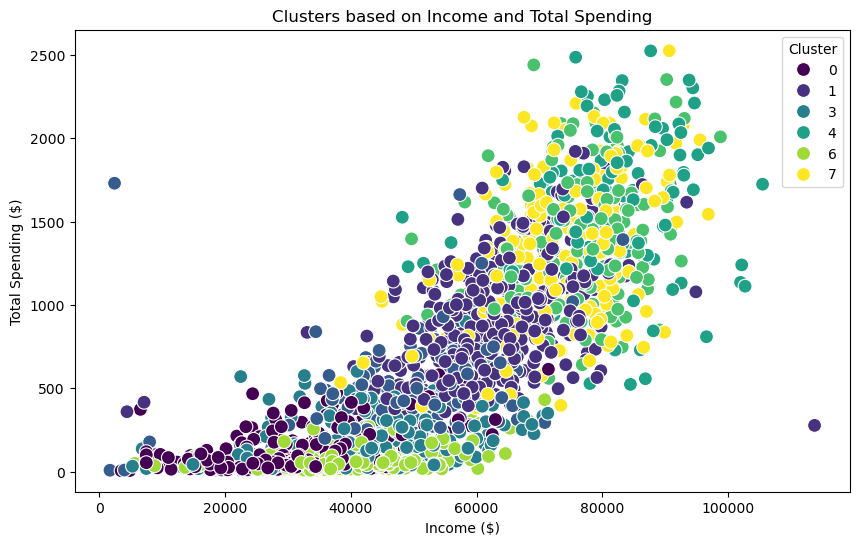

In [48]:
# Visualize the clusters based on key features (e.g., MntTotal vs Income)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='MntTotal', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Clusters based on Income and Total Spending')
plt.xlabel('Income ($)')
plt.ylabel('Total Spending ($)')
plt.legend(title='Cluster')
plt.show()

C:\Users\Masood\AppData\Local\Temp\ipykernel_11672\2320998076.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_profile.index, y='Response_Rate', data=cluster_profile, palette='magma')


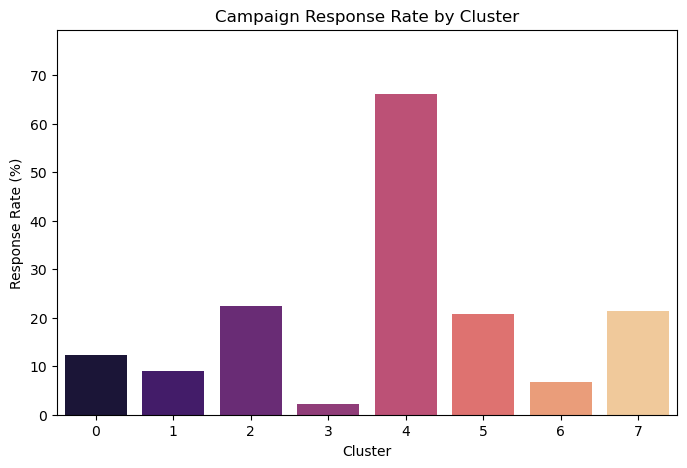

In [50]:
# Visualize the cluster response rates
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_profile.index, y='Response_Rate', data=cluster_profile, palette='magma')
plt.title('Campaign Response Rate by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Response Rate (%)')
plt.ylim(0, cluster_profile['Response_Rate'].max() * 1.2)
plt.show()